<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/GreenSpaceSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the runtime to GPU

In [3]:
%pip install -U segment-geospatial

In [4]:
import leafmap
from samgeo import SamGeo2

# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Path to your folder
folder_path = '/content/drive/My Drive/Sentinel2ANew'

# List files in the folder to verify access
print(os.listdir(folder_path))

['20181217.tif', '20181227.tif', '20190126.tif', '20190322.tif', '20190312.tif', '20190401.tif', '20190421.tif', '20190531.tif', '20190501.tif', '20190610.tif', '20190630.tif', '20190819.tif', '20190720.tif', '20190908.tif', '20191008.tif', '20191028.tif', '20191013.tif', '20191202.tif', '20191207.tif', '20191217.tif', '20191222.tif', '20200210.tif', '20200225.tif', '20200215.tif', '20200515.tif', '20200525.tif', '20200520.tif', '20200714.tif', '20200917.tif', '20200922.tif', '20200927.tif', '20201002.tif', '20201017.tif', '20201022.tif', '20201027.tif', '20201106.tif', '20201121.tif', '20201126.tif', '20201201.tif', '20201216.tif', '20210120.tif', '20210125.tif', '20210130.tif', '20210214.tif', '20210224.tif', '20210301.tif', '20210326.tif', '20210410.tif', '20210425.tif', '20210609.tif', '20210629.tif', '20210619.tif', '20211007.tif', '20211106.tif', '20211027.tif', '20211111.tif', '20211121.tif', '20211116.tif', '20211201.tif', '20211126.tif', '20211206.tif', '20211211.tif', '202112

In [ ]:
# List files in the folder to verify access
# files = os.listdir(folder_path)
# print("Original files:", files)

# Iterate through the files and rename them
for filename in folder_path:
    if filename.endswith('.tif'):
        # Extract the date part from the filename
        date_str = filename[:-4]  # Remove the '.tif' extension
        # Convert to the desired format
        new_date_str = date_str.replace('-', '')  # Remove dashes
        new_filename = f"{new_date_str}.tif"  # Add the .tif extension

        # Create full paths for the old and new filenames
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        # print(f'Renamed: {filename} to {new_filename}')

# List files again to verify the changes
print(os.listdir(folder_path))

Updated files: ['20181217.tif', '20181227.tif', '20190126.tif', '20190312.tif', '20190322.tif', '20190401.tif', '20190421.tif', '20190426.tif', '20190501.tif', '20190506.tif', '20190526.tif', '20190610.tif', '20190531.tif', '20190630.tif', '20190625.tif', '20190705.tif', '20190918.tif', '20190819.tif', '20190720.tif', '20190908.tif', '20191028.tif', '20191008.tif', '20191013.tif', '20191117.tif', '20191202.tif', '20191207.tif', '20191217.tif', '20191222.tif', '20200116.tif', '20200210.tif', '20200126.tif', '20200215.tif', '20200430.tif', '20200410.tif', '20200225.tif', '20200515.tif', '20200520.tif', '20200525.tif', '20200614.tif', '20200629.tif', '20200912.tif', '20200917.tif', '20200922.tif', '20200927.tif', '20201002.tif', '20201017.tif', '20201027.tif', '20201022.tif', '20201106.tif', '20200714.tif', '20201126.tif', '20201121.tif', '20201201.tif', '20201216.tif', '20210115.tif', '20210120.tif', '20210125.tif', '20210130.tif', '20210214.tif', '20210224.tif', '20210301.tif', '2021032

# Initialize Model

In [6]:
predictor = SamGeo2(
    model_id="sam2-hiera-tiny",
    video=True,
)

# Specify the Input Data Path

In [7]:

predictor.set_video(folder_path)

frame loading (JPEG): 100%|██████████| 86/86 [00:07<00:00, 10.78it/s]


interactive(children=(IntSlider(value=0, description='Image', max=85), Output()), _dom_classes=('widget-intera…

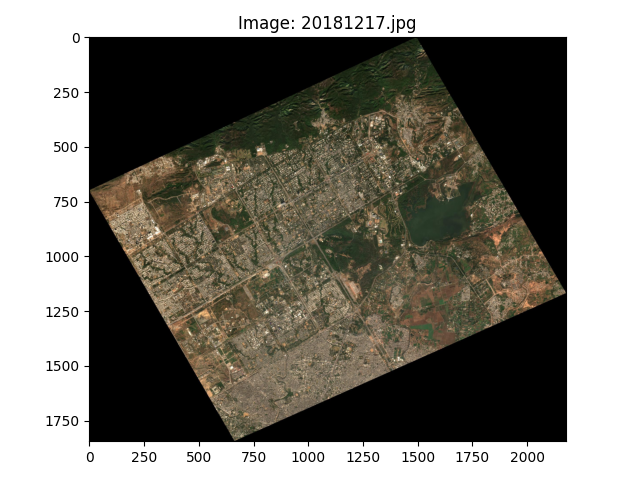

In [8]:
predictor.show_images()

In [9]:
prompts = {}

# Define the points and labels that will be the same for each frame
points = [[793,386], [1556,820], [734, 1629]]
labels = [1, 1, 0]

# Loop to generate prompts for frame_idx from 0 to 85
for i in range(86):
    prompts[i] = {
        "points": points,
        "labels": labels,
        "frame_idx": i,
    }

# Output the prompts dictionary
print(prompts)


{0: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 0}, 1: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 1}, 2: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 2}, 3: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 3}, 4: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 4}, 5: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 5}, 6: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 6}, 7: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 7}, 8: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 8}, 9: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'frame_idx': 9}, 10: {'points': [[793, 386], [1556, 820], [734, 1629]], 'labels': [1, 1, 0], 'fr

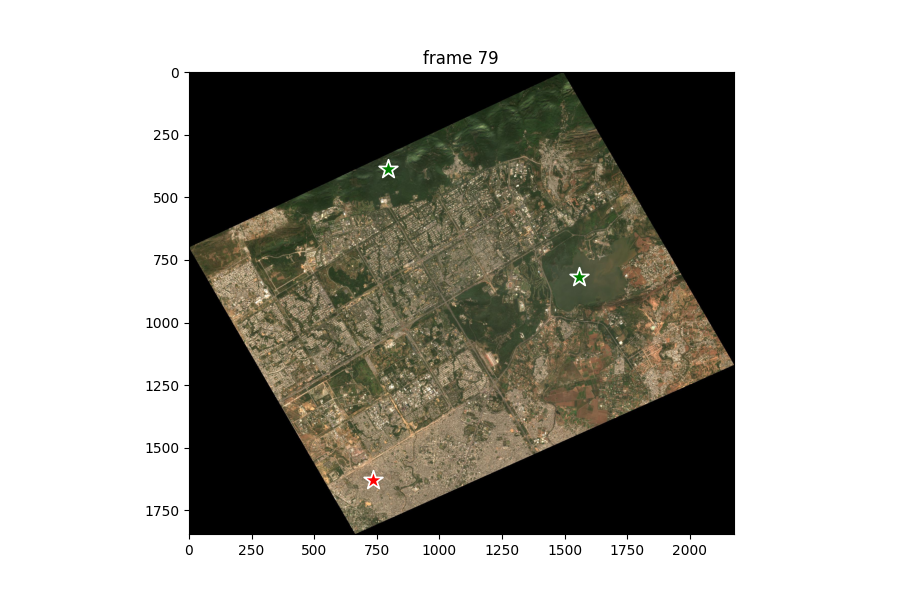

In [10]:
predictor.show_prompts(prompts, frame_idx=79)

# Segment the Objects

In [ ]:
predictor.predict_video()

propagate in video:  34%|███▎      | 29/86 [00:12<01:13,  1.28s/it]

# Save Results

In [ ]:
predictor.save_video_segments("segmentsofSentinel2A")

Rendering frames: 100%|██████████| 111/111 [00:01<00:00, 70.06it/s]


In [ ]:
predictor.save_video_segments_blended(
    "TS_blended_Sentinel2A", fps=5, output_video="segments_blended_Sentinel2A.mp4"
)

Rendering frames: 100%|██████████| 111/111 [00:37<00:00,  2.94it/s]


Video saved as segments_blended_Sentinel2A.mp4
